# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [90]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [91]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [92]:
#  1. Get the total rides for each city type
city_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
city_ride_count.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [93]:
# 2. Get the total drivers for each city type
total_drivers_city = pyber_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_city.head()


type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [94]:
#  3. Get the total amount of fares for each city type
total_fares_city = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_city.head()


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [95]:
#  4. Get the average fare per ride for each city type. 
average_fares_city = pyber_data_df.groupby(["type"]).mean()["fare"]
average_fares_city.head()

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [96]:
# 5. Get the average fare per driver for each city type. 
avg_fare_city_driver = pyber_data_df.groupby(["driver_count","type"]).mean()["fare"]
avg_fare_city_driver.head()

driver_count  type    
1             Rural       37.438125
              Suburban    30.552895
2             Rural       32.138235
              Suburban    29.748276
3             Suburban    30.890000
Name: fare, dtype: float64

In [97]:
#  6. Create a PyBer summary DataFrame. 
#df_summary=pyber_data_df
#print(df_summary.info)
df_summary = pyber_data_df.copy()
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [98]:
#  7. Cleaning up the DataFrame. Delete the index name
#pyber_data_df.index.ride_id = None
#pyber_data_df.drop('ride_id')
pyber_data_df = pyber_data_df.drop(columns=['ride_id'])

In [99]:
#  8. Format the columns.
pyber_data_df

,city,date,fare,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,46,Urban
...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4,Rural


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [100]:
# 1. Read the merged DataFrame

merged_df = pyber_data_df.copy()

In [101]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

temp = []
for i in range(0, len(merged_df["date"])):
    temp.append(merged_df["date"][i].split(" ")[0])
merged_df["date"] = temp

df = merged_df.groupby(["type","date"]).sum()["fare"]
df

type   date      
Rural  2019-01-01     43.69
       2019-01-02     52.12
       2019-01-03     19.90
       2019-01-04     24.88
       2019-01-06     47.33
                      ...  
Urban  2019-05-04    323.57
       2019-05-05    322.10
       2019-05-06    181.20
       2019-05-07    258.01
       2019-05-08    170.82
Name: fare, Length: 334, dtype: float64

In [102]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
df = df.reset_index()
df

,type,date,fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33
...,...,...,...
329,Urban,2019-05-04,323.57
330,Urban,2019-05-05,322.10
331,Urban,2019-05-06,181.20
332,Urban,2019-05-07,258.01


In [103]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_1 = pd.pivot_table(df, values='fare', index=['date'], columns=['type'], aggfunc=sum)
pivot_1

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [104]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

df = pivot_1[ (pivot_1.index >= "2019-01-01") & ( pivot_1.index <= "2019-04-29")]
df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [105]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df.index = pd.to_datetime(df.index)

In [106]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [107]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = df.resample('W').sum()

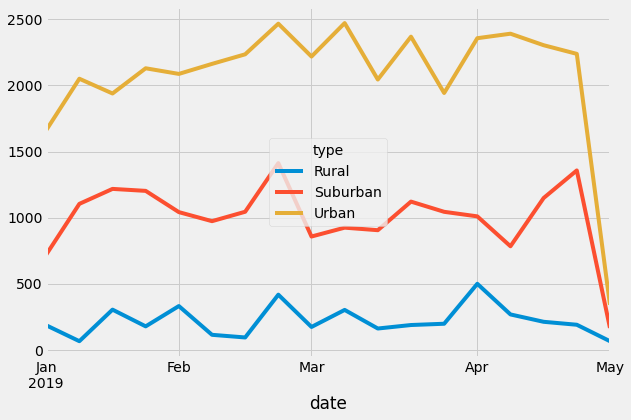

In [108]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

df.plot(figsize = (9, 6))
plt.show()